In [1]:
#@title Imports
# use matplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
import numpy as np
import math
from scipy import special

# from ipysheet import sheet, column
# import qgrid
import pandas as pd

# from google.colab import output
# output.enable_custom_widget_manager()

import refnx, scipy

# the analysis module contains the curvefitting engine
from refnx.analysis import CurveFitter, Objective, Parameter, GlobalObjective, process_chain

# the reflect module contains functionality relevant to reflectometry
from refnx.reflect import SLD, ReflectModel, Structure, LipidLeaflet, Slab

# the ReflectDataset object will contain the data
from refnx.dataset import ReflectDataset

%matplotlib inline
plt.style.use('classic')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'white'


# set tick width
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 3


In [2]:
conditions = ['bilayer', '1p6', '3p2']

condition = conditions[0]

if condition == '1p6':
    pth = '/mnt/ceph/home/ms9743/analysis/TetherBayes2022/JAN21_Rascal2020_bil_1p6PXG/dataFiles/'

    data_d2o_up = ReflectDataset(pth + 'POLLREFfinalIvsQ_26854_26855_26856_IvsQ_26854_1_IvsQ_26855_1_IvsQ_26856_1.dat.txt')
    data_d2o_up.name = "D$_2$O up"

    data_d2o_down = ReflectDataset(pth + 'POLLREFfinalIvsQ_26854_26855_26856_IvsQ_26854_2_IvsQ_26855_2_IvsQ_26856_2.dat.txt')
    data_d2o_down.name = "D$_2$O down"

    data_gmw_up = ReflectDataset(pth + 'POLLREFfinalIvsQ_26860_26861_26862_IvsQ_26860_1_IvsQ_26861_1_IvsQ_26862_1.dat.txt')
    data_gmw_up.name = "GMW up"

    data_gmw_down = ReflectDataset(pth + 'POLLREFfinalIvsQ_26860_26861_26862_IvsQ_26860_2_IvsQ_26861_2_IvsQ_26862_2.dat.txt')
    data_gmw_down.name = "GMW down"

    data_h2o_up = ReflectDataset(pth + 'POLLREFfinalIvsQ_26863_26864_26865_IvsQ_26863_1_IvsQ_26864_1_IvsQ_26865_1.dat.txt')
    data_h2o_up.name = "H$_2$O up"

    data_h2o_down = ReflectDataset(pth + 'POLLREFfinalIvsQ_26863_26864_26865_IvsQ_26863_2_IvsQ_26864_2_IvsQ_26865_2.dat.txt')
    data_h2o_down.name = "H$_2$O down"
    
elif condition == '3p2':
    pth = '/mnt/ceph/home/ms9743/analysis/TetherBayes2022/JAN21_Rascal21_bil_3p2PXG/dataFiles/'

    data_d2o_up = ReflectDataset(pth + 'POLLREFfinalIvsQ_26875_26876_26877_IvsQ_26875_1_IvsQ_26876_1_IvsQ_26877_1.dat.txt')
    data_d2o_up.name = "D$_2$O up"

    data_d2o_down = ReflectDataset(pth + 'POLLREFfinalIvsQ_26875_26876_26877_IvsQ_26875_2_IvsQ_26876_2_IvsQ_26877_2.dat.txt')
    data_d2o_down.name = "D$_2$O down"

    data_gmw_up = ReflectDataset(pth + 'POLLREFfinalIvsQ_26878_26879_26880_IvsQ_26878_1_IvsQ_26879_1_IvsQ_26880_1.dat.txt')
    data_gmw_up.name = "GMW up"

    data_gmw_down = ReflectDataset(pth + 'POLLREFfinalIvsQ_26878_26879_26880_IvsQ_26878_2_IvsQ_26879_2_IvsQ_26880_2.dat.txt')
    data_gmw_down.name = "GMW down"

    data_h2o_up = ReflectDataset(pth + 'POLLREFfinalIvsQ_26881_26882_26883_IvsQ_26881_1_IvsQ_26882_1_IvsQ_26883_1.dat.txt')
    data_h2o_up.name = "H$_2$O up"

    data_h2o_down = ReflectDataset(pth + 'POLLREFfinalIvsQ_26881_26882_26883_IvsQ_26881_2_IvsQ_26882_2_IvsQ_26883_2.dat.txt')
    data_h2o_down.name = "D$_2$O down"
    
elif condition == 'bilayer':
    pth = '/home/ms9743/analysis/TetherBayes2022/DEC21_Rascal2020_bilayer/dataFiles/'

    data_d2o_up = ReflectDataset(pth + 'POLLREFfinalIvsQ_26838_26839_26840_IvsQ_26838_1_IvsQ_26839_1_IvsQ_26840_1.dat')
    data_d2o_up.name = "D$_2$O up"

    data_d2o_down = ReflectDataset(pth + 'POLLREFfinalIvsQ_26838_26839_26840_IvsQ_26838_2_IvsQ_26839_2_IvsQ_26840_2.dat')
    data_d2o_down.name = "D$_2$O down"

    data_gmw_up = ReflectDataset(pth + 'IvsQ_26841_26842_26843_IvsQ_26841_1_IvsQ_26842_1_IvsQ_26843_1.dat.txt')
    data_gmw_up.name = "GMW up"

    data_gmw_down = ReflectDataset(pth + 'IvsQ_26841_26842_26843_IvsQ_26841_2_IvsQ_26842_2_IvsQ_26843_2.dat.txt')
    data_gmw_down.name = "GMW down"

    data_h2o_up = ReflectDataset(pth + 'IvsQ_26844_26845_26846_IvsQ_26844_1_IvsQ_26845_1_IvsQ_26846_1.dat.txt')
    data_h2o_up.name = "H$_2$O up" 

    data_h2o_down = ReflectDataset(pth + 'IvsQ_26844_26845_26846_IvsQ_26844_2_IvsQ_26845_2_IvsQ_26846_2.dat.txt')
    data_h2o_down.name = "H$_2$O down"

In [42]:
# Define some SLDs
si_sld = SLD(2.07 + 0j)
sio2_sld = SLD(3.47 + 0j)

au_sld = SLD(4.2 + 0j)
au_sld.real.setp(vary=False) #, bounds=(4.2, 4.7))

PEG_sld = SLD(0.622 + 0j)
PDP_sld = SLD(1.01 + 0j)

# the following represent the solvent contrasts used in the experiment
d2o = SLD(6.36 + 0j)
h2o = SLD(-0.56 + 0j)
gmw = SLD(4.5 + 0j)

# We want the `real` attribute parameter to vary in the analysis, and we want to apply
# uniform bounds. The `setp` method of a Parameter is a way of changing many aspects of
# Parameter behaviour at once.
d2o.real.setp(vary=True, bounds=(6.1, 6.36))
d2o.real.name='d2o SLD'

gmw.real.setp(vary=True, bounds=(4.1, 4.7))
gmw.real.name='gmw SLD'


In [39]:
#@title Parameter


# define model parameters [value, min, max, vary?]
data = {
        'PDP_thick'    : [6, 5, 15, True],
        'PDP_hydration': [0.25, 0.2, 0.6, True],
        'PEG_thick'    : [73, 40, 100, True],
        'PEG_hydration': [0.53, 0.2, 1, True],
        'PEG_rough'    : [11, 5, 25, True],
        'lipid_APM'    : [66, 50, 80, True],
        'WPLH'         : [14.8, 5, 30, True],
        'PCoverage'    : [0.125, 0, 0.3, True],
        'protrus_thick': [40, 0, 65, True],
        'lipid_APMT'   : [110, 40, 100, True],
        'WPLT'         : [8.6, 0, 20, True]
        }

    
# Load best fit parameters from tetjer only fit:  
df = pd.read_pickle('tether_bilayer_params.pkl') #pd.DataFrame.from_dict(data, orient='index', columns=['Value', 'Min', 'Max', 'Vary'])

for par in data:
  locals()[par] = par
  locals()[par] = Parameter(data[par][0], par, 
                            vary=data[par][3], 
                            bounds=(data[par][1], data[par][2]))


# generate parameters from df

for par in df.T:
  locals()[par] = par
  print(par)
  locals()[par] = Parameter(df.loc[par].Value, par, 
                            vary=True, 
                            bounds=(df.loc[par].Min, df.loc[par].Max))

# Fix hard layer parameters from thether only fit
oxide_thick.setp(vary=False)
substr_rough.setp(vary=False)
py_thick.setp(vary=False)
py_rough.setp(vary=False)
py_SLD_up.setp(vary=False)
py_SLD_down.setp(vary=False)
# au_sld.setp(vary=False)
au_thick.setp(vary=False)
au_rough.setp(vary=False)


# bilayer coverage  
bilayer_coverage = Parameter(0.8, 'bilayer coverage')
bilayer_coverage.setp(vary=True, bounds=(0, 1))

df

substr_rough
oxide_thick
au_thick
au_rough
py_SLD_up
py_SLD_down
py_rough
py_thick
PDP_thick
PDP_hydration
PEG_thick
PEG_hydration
PEG_rough
lipid_APM
WPLH
PCoverage
protrus_thick
lipid_APMT
WPLT


Value    Min    Max  Vary
substr_rough     6.000    5.0   10.0  True
oxide_thick     13.000   10.0   20.0  True
au_thick       145.000  120.0  200.0  True
au_rough         9.000    3.0   15.0  True
py_SLD_up       10.000    8.0   12.0  True
py_SLD_down      7.000    5.0    8.0  True
py_rough         8.000    5.0   20.0  True
py_thick       129.000  110.0  180.0  True
PDP_thick        6.000    5.0   15.0  True
PDP_hydration    0.250    0.2    0.6  True
PEG_thick       73.000   40.0  100.0  True
PEG_hydration    0.530    0.2    1.0  True
PEG_rough       11.000    5.0   25.0  True
lipid_APM       66.000   50.0  120.0  True
WPLH            14.800    0.0   30.0  True
PCoverage        0.125    0.0    0.3  True
protrus_thick   40.000    0.0   65.0  True
lipid_APMT     190.000   40.0  250.0  True
WPLT             8.600    0.0   20.0  True

In [61]:
#@title Bilayer model definition
def bilayer(solvent):
  # Calculations...
  #Define all the neutron b's
  bc = 0.6646e-4	#Carbon
  bo = 0.5843e-4	#Oxygen
  bh = -0.3739e-4	#Hydrogen
  bp = 0.513e-4	#Phosphorus
  bn = 0.936e-4	#Nitrogen
  bd = 0.6671e-4	#Deuterium
  bs = 2.847e-4 #Sulphur

  #Formulae of the molecule sections...
  CH = (1*bc) + (1*bh)
  CH2 = (1*bc) + (2*bh)
  CH3 = (1*bc) + (3*bh)
  D2O = (2*bd) + (1*bo)
  H2O = (2*bh) + (1*bo)
#   print(D2O)
  # PDP_b = (2*bn) + (7*bc) + (9*bh) + (2*bs) + (1*bo);
  # PEG_unit = (2*CH2)+ (1*bo);
  PEG_sld = 6.22e-7
  PDP_sld = 1.01e-6

  # Calculate mole fraction of D2O from the bulk SLD..
  d2o_molfr = (1/D2O-H2O)*((solvent.real.value*27.64)-H2O)
  wMol = (d2o_molfr * D2O) + ((1-d2o_molfr)*H2O)

  # sum b's of all the different fragments
  sum_b_tails = -0.00026668800000000006 # (28*CH2) + (2*CH) + (2*CH3) + (WPLT * wMol)
  sum_popc_heads = 0.0006007780000000002 # (8*bo) + (1*bp) + (1*bn) + (2*bc) + (4*CH2) + (3*CH3) + (1*CH)
  sum_popg_heads = 0.0009230619999999998 # (10*bo) + (1*bp) + (2*bc) + (4*CH2) + (2*CH) + (2*bh)
  sum_b_heads = (1/4)*(3*(sum_popc_heads) + (sum_popg_heads)) + (WPLH * wMol)
  sum_b_headsT = (1/4)*(3*(sum_popc_heads) + (sum_popg_heads)) + (WPLH * wMol)
  sum_mscl = (1990*bc) +(455*bn) + (433*bo) + (20*bs) + (((3157.5-(594.5*0.7))*bh)) + (d2o_molfr*(594.5*0.7)*bd) + ((1-d2o_molfr)*(594.5*0.7)*bh)

  #Cytoplasmic section
  sum_mscl_cterminal = (910*bc) +(280*bn) + (296*bo) + ((1467-(387*0.9))*bh) + (d2o_molfr*(387*0.9)*bd) + ((1-d2o_molfr)*(387*0.9)*bh)
  sum_mscl_nterminal = (315*bc) +(75*bn) + (81*bo) + (5*bs) + ((467-(102*0.9))*bh) + (d2o_molfr*(102*0.9)*bd) + ((1-d2o_molfr)*(102*0.9)*bh)
  sum_mscl_histag = (180*bc) +(90*bn) + (31*bo) + ((197-(47*0.9))*bh) + (d2o_molfr*(47*0.9)*bd) + ((1-d2o_molfr)*(47*0.9)*bh)
  sum_mscl_cyto = sum_mscl_cterminal + sum_mscl_nterminal + sum_mscl_histag
    

  #volumes of each fragment
  vol_w = 29.7
  volume_tails = 932.5 #+ (WPLT * vol_w)
  vfsolv_tails = 1-bilayer_coverage #(WPLT * vol_w)/volume_tails
    
  volume_heads = ((1/4)*((3*319)+(257)))+ (WPLH * vol_w) #R.Armen and J.Pan
  vfsolv_heads = (WPLH * vol_w)/volume_heads
    
  volume_headsT = ((1/4)*((3*319)+(257)))+ (WPLH * vol_w)
  vfsolv_headsT = (WPLH * vol_w)/volume_headsT
    
  volume_mscl_cterminus = 25979.5
  volume_mscl_nterminus = 8525
  volume_histag= 4719
  volume_mscl_cyto = volume_mscl_cterminus + volume_mscl_nterminus + volume_histag
  volume_mscl = 53987+6225.5

  LTailThick = volume_tails / lipid_APM
  LHeadThick = volume_heads / lipid_APM
  LTailThickT = volume_tails / lipid_APMT
  LHeadThickT = volume_headsT / lipid_APMT

  Rho_heads = sum_b_heads / volume_heads
  Rho_headsT = sum_b_headsT / volume_headsT
  Rho_tails = sum_b_tails / volume_tails
  Rho_mscl = sum_mscl / volume_mscl

  Rho_mscl_cyto = sum_mscl_cyto / volume_mscl_cyto
  Rho_h_m = ((1-PCoverage)*Rho_heads) + ((PCoverage)*Rho_mscl)
  Rho_t_m = ((1-PCoverage)*Rho_tails) + ((PCoverage)*Rho_mscl)
  Rho_h_mT = ((1-PCoverage)*Rho_headsT) + ((PCoverage)*Rho_mscl)
#   Ccoverage = ((volume_mscl_cyto*(2*(LHeadThick+LTailThick)))/(protrus_thick*volume_mscl))*(PCoverage)
  Ccoverage = ((volume_mscl_cyto*((LHeadThick+LTailThick+LHeadThickT+LTailThickT)))/(protrus_thick*volume_mscl))*(PCoverage)
  #Lcoverage = ((volume_mscl_periplasmic*(2*(HeadThick+TailThick)))/(mscl_prot_thick_t*volume_mscl))*(PCoverage)
  Rho_mscl_prot = (Ccoverage)*Rho_mscl_cyto + ((1-Ccoverage)*(solvent.real.value))
  


# make structue out of this:
  
  inner_head_l = Slab(LHeadThick, Rho_h_m, PEG_rough , name='Inner HG', vfsolv=0, interface=None)
  inner_tail_l = Slab(LTailThick, Rho_t_m, PEG_rough , name='Inner Tail', vfsolv=1-bilayer_coverage, interface=None) 
  outer_head_l = Slab(LHeadThickT, Rho_h_mT, PEG_rough , name='Outer HG', vfsolv=0, interface=None)
  outer_tail_l = Slab(LTailThickT, Rho_t_m, PEG_rough , name='Outer Tail', vfsolv=1-bilayer_coverage, interface=None) 

#   mscl_prot_l = Slab(protrus_thick, Rho_mscl_prot, PEG_rough , name='mscl_prot_layer', vfsolv=0, interface=None)
  mscl_prot_l = Slab(protrus_thick, Rho_mscl_cyto, PEG_rough , name='MscL', vfsolv=(1-Ccoverage), interface=None)

  s_bilayer = inner_head_l | inner_tail_l | outer_tail_l | outer_head_l #| mscl_prot_l# | solvent(0, solv_roughness)

  total_thickness = LTailThick + LHeadThick + LTailThickT + LHeadThickT
    
  return s_bilayer, total_thickness, PCoverage, vfsolv_heads, vfsolv_tails, vfsolv_headsT, Ccoverage


In [62]:
# define layers

solv_roughness = Parameter(3, 'bilayer/solvent roughness')
solv_roughness.setp(vary=True, bounds=(2, 15))

oxide_l = Slab(oxide_thick, sio2_sld, substr_rough , name='oxide_layer', vfsolv=0, interface=None)
py_up_l = Slab(py_thick, py_SLD_up, py_rough , name='py_up_layer', vfsolv=0, interface=None)
py_down_l = Slab(py_thick, py_SLD_down, py_rough , name='py_down_layer', vfsolv=0, interface=None)
au_l = Slab(au_thick, au_sld, au_rough , name='Au', vfsolv=0, interface=None)
PDP_l = Slab(PDP_thick, PDP_sld, au_rough , name='PDP', vfsolv=PDP_hydration, interface=None)
PEG_l = Slab(PEG_thick, PEG_sld, PEG_rough , name='PEG', vfsolv=PEG_hydration, interface=None)

s_d2o_up = si_sld | oxide_l | py_up_l | au_l | PDP_l | PEG_l | bilayer(d2o)[0] | d2o(0, solv_roughness)
s_gmw_up = si_sld | oxide_l | py_up_l | au_l | PDP_l | PEG_l | bilayer(gmw)[0] | gmw(0, solv_roughness) 
s_h2o_up = si_sld | oxide_l | py_up_l | au_l | PDP_l | PEG_l | bilayer(h2o)[0] | h2o(0, solv_roughness)

s_d2o_down = si_sld | oxide_l | py_down_l | au_l | PDP_l | PEG_l | bilayer(d2o)[0] | d2o(0, solv_roughness)
s_gmw_down = si_sld | oxide_l | py_down_l | au_l | PDP_l | PEG_l | bilayer(gmw)[0] | gmw(0, solv_roughness) 
s_h2o_down = si_sld | oxide_l | py_down_l | au_l | PDP_l | PEG_l | bilayer(h2o)[0] | h2o(0, solv_roughness)


In [63]:
model_scale = Parameter(1,'common scale')
model_scale.setp(vary=True, bounds=(0.9,1.1))

# Define models
model_d2o_up = ReflectModel(s_d2o_up, scale=model_scale)
model_d2o_down = ReflectModel(s_d2o_down, scale=model_scale)

model_gmw_up = ReflectModel(s_gmw_up, scale=model_scale)
model_gmw_down = ReflectModel(s_gmw_down, scale=model_scale)

model_h2o_up = ReflectModel(s_h2o_up, scale=model_scale)
model_h2o_down = ReflectModel(s_h2o_down, scale=model_scale)

model_d2o_up.scale.setp(vary=True, bounds=(0.9, 1.1))

# Backgrounds
model_d2o_up.bkg.setp(3e-6, vary=True, bounds=(1e-7, 1e-5))
model_gmw_up.bkg.setp(3e-6, vary=True, bounds=(1e-7, 1e-5))
model_h2o_up.bkg.setp(3e-6, vary=True, bounds=(1e-7, 1e-5))

model_d2o_down.bkg.setp(3e-6, vary=True, bounds=(1e-7, 1e-5))
model_gmw_down.bkg.setp(3e-6, vary=True, bounds=(1e-7, 1e-5))
model_h2o_down.bkg.setp(3e-6, vary=True, bounds=(1e-7, 1e-5))

In [64]:
def Asymconvstep(x,xw,xcen,s1,s2,h):
    '''
     Produces a step function convoluted with differnt error functions
     on each side.
     Convstep (x,xw,xcen,s1,s2,h)
           x = vector of x values
          xw = Width of step function
        xcen = Centre point of step function
           s1 = Roughness parameter of left side
           s2 = Roughness parameter of right side
           h = Height of step function.
    '''


    r = xcen + (xw/2)
    l = xcen - (xw/2)

    a = (x-l)/((2**0.5)*s1)
    b = (x-r)/((2**0.5)*s2)

    f = (h/2)*(special.erf(a)-special.erf(b))
#     f = (h/2)*(math.erf(a)-math.erf(b))
    return f


def plot_volume_profiles(axes, structure, start=None, stop=None):
#     %matplotlib inline
    d = 0
    
    for layer in structure:
        d += layer.thick.value

    if start is None and stop is not None:
        x = np.arange(-50,stop,0.1)
    elif start is not None and stop is None:
        x = np.arange(start,d+50,0.1)
    else:
       x = np.arange(start,stop,0.1) 
    
    solvent = np.zeros(len(x))
    
    cen = 0
    leg = []
#     fig, axes = plt.subplots(ncols=1, figsize=(12,8))

#     plot substrate
    axes.plot(x,Asymconvstep(x, 100,-50,1,structure[1].rough.value,1), 
                 label=None, color="black", linewidth=3)
    
    col = ["grey", "grey", "purple", "gold", "cyan", 
               "purple", "green",
              "grey", "grey", "green", "red"]
    

    _, bilayer_thickness, PCoverage, vfsolv_heads, vfsolv_tails, vfsolv_headsT, Ccoverage = bilayer(d2o)
    
    # place holders for substrate and oxide layer
    volfractions = [0, 0]
    for i in range(4):        
        volfractions.append(structure[i+2].vfsolv.value)
        
    volfractions.extend([vfsolv_heads.value, 
                         vfsolv_tails.value, 
                         vfsolv_tails.value, 
                         vfsolv_headsT.value, 
                         1-Ccoverage.value])
        
#     print(len(volfractions), volfractions, len(structure))

    for i in range(1, len(structure)-2):
        laynum=i
        layer = structure[laynum]
        prev_layer = structure[laynum-1]
        next_layer = structure[laynum+1]

        cen += prev_layer.thick.value/2 + layer.thick.value/2
        if i < 3:
            my_label=None
        else:
            my_label=layer.name
        axes.plot(x,Asymconvstep(x,layer.thick.value,cen,layer.rough.value,
                                 next_layer.rough.value, 1-volfractions[laynum]),
                  label=my_label, linewidth=4, color=col[laynum])

#         print(laynum, structure[laynum].name, 1-volfractions[laynum])
            
        solvent += Asymconvstep(x,layer.thick.value,cen,layer.rough.value,
                                next_layer.rough.value, volfractions[laynum])
                   
    
    
    laynum=len(structure)-2
    layer=structure[laynum]
    preprev_layer = structure[laynum-2]
    prev_layer = structure[laynum-1]
    next_layer = structure[laynum+1]
    cen += prev_layer.thick.value/2 + layer.thick.value/2
    
    # bilayer part
    protein_vf_bilayer = Asymconvstep(x,bilayer_thickness.value,
                                      cen-bilayer_thickness.value/2-layer.thick.value/2,prev_layer.rough.value,
                                 layer.rough.value, PCoverage.value)
    
#     solvent += Asymconvstep(x,bilayer_thickness.value,
#                             cen-bilayer_thickness.value/2-layer.thick.value/2,prev_layer.rough.value,
#                                  layer.rough.value, 1-PCoverage.value)

    # cytoplasmic part
    protein_vf = Asymconvstep(x,layer.thick.value,cen,layer.rough.value,
                                 next_layer.rough.value, Ccoverage.value)
    
    solvent += Asymconvstep(x,layer.thick.value,cen,layer.rough.value,
                                next_layer.rough.value, 1-Ccoverage.value)
    
    # bulk
    axes.plot(x,protein_vf+protein_vf_bilayer, label=layer.name, linewidth=4, color=col[laynum])
    # solvent
    axes.plot(x, solvent+Asymconvstep(x,200,cen+100+layer.thick.value/2,next_layer.rough.value, next_layer.rough.value, 1), 
              label="solvent", linestyle='dashed', color="blue") 
    
    axes.legend(loc=0, prop={"size": 16}, frameon=False)

    axes.tick_params(axis='both', which='major', labelsize=20, direction='in')
    axes.tick_params(axis='both', which='minor', labelsize=12)
    axes.set_xlabel("Distance from Si / $\\AA$", fontsize=24)
    axes.set_ylabel("Volume fraction", fontsize=20)
    plt.ylim([-0.05,1.1])


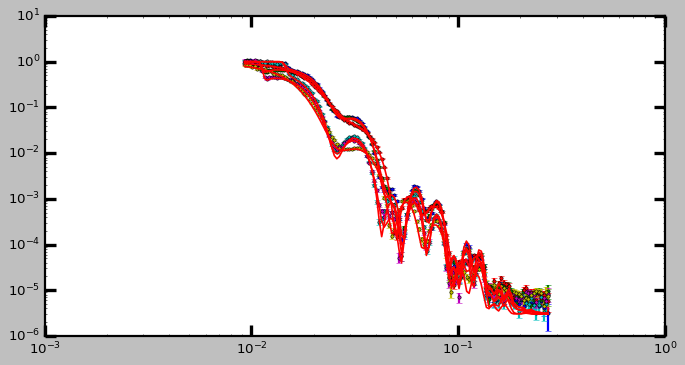

In [65]:

aux_pars = [WPLH, lipid_APMT, lipid_APM, bilayer_coverage, protrus_thick, PCoverage, model_scale]
objective_d2o_up = Objective(model_d2o_up, data_d2o_up, auxiliary_params=aux_pars)
objective_d2o_down = Objective(model_d2o_down, data_d2o_down, auxiliary_params=aux_pars)

objective_gmw_up = Objective(model_gmw_up, data_gmw_up, auxiliary_params=aux_pars)
objective_gmw_down = Objective(model_gmw_down, data_gmw_down, auxiliary_params=aux_pars)

objective_h2o_up = Objective(model_h2o_up, data_h2o_up, auxiliary_params=aux_pars)
objective_h2o_down = Objective(model_h2o_down, data_h2o_down, auxiliary_params=aux_pars)

global_objective = GlobalObjective([objective_d2o_up, objective_gmw_up, objective_h2o_up,
                                   objective_d2o_down, objective_gmw_down, objective_h2o_down])

fig, ax = global_objective.plot()

ax.set_yscale('log')
ax.set_xscale('log')

In [66]:
#@title Nice plotting
def my_plot(ax, objectives, pvals=None, samples=0, parameter=None, fig=None):
        """
        Plot the data/model for all the objectives in the GlobalObjective.

        Matplotlib must be installed to use this method.

        Parameters
        ----------
        pvals : np.ndarray, optional
            Numeric values for the Parameter's that are varying
        samples: number, optional
            If the objective has been sampled, how many samples you wish to
            plot on the graph.
        parameter: refnx.analysis.Parameter, optional
            Creates an interactive plot for the Parameter in Jupyter. Requires
            ipywidgets be installed. Use with %matplotlib notebook/qt.
        fig: Figure instance, optional
            If `fig` is not supplied then a new figure is created. Otherwise
            the graph is created on the current axes on the supplied figure.

        Returns
        -------
        fig, ax : :class:`matplotlib.Figure`, :class:`matplotlib.Axes`
            `matplotlib` figure and axes objects.

        """

        # self.setp(pvals)

#         if fig is None:
#             import matplotlib.pyplot as plt

#             fig = plt.figure(figsize=(8,12))
#             ax = fig.add_subplot(111)
#         else:
#             ax = fig.gca()

        generative_plots = []

        if samples > 0:
            saved_params = np.array(self.parameters)

            # Get a number of chains, chosen randomly, set the objectives,
            # and plot the model.
            for pvec in self.pgen(ngen=samples):
                self.setp(pvec)

                for objective in self.objectives:
                    y, y_err, model = objective._data_transform(
                        model=objective.generative()
                    )

                    ax.plot(objective.data.x, model, color="k", alpha=0.01)

            # put back saved_params
            # self.setp(saved_params)
        col = ["midnightblue", "royalblue", 
               "darkgoldenrod", "gold",
              "red", "lightcoral"]
        offset = [1, 8, 1000, 8e3, 1e6, 8e6]
        for i, objective in enumerate(objectives):
            # add the data (in a transformed fashion)
            y, y_err, model = objective._data_transform(
                model=objective.generative()
            )

            if objective.weighted:
                ax.errorbar(
                    objective.data.x,
                    y/offset[i]*objective.data.x**4,
                    y_err/offset[i]*objective.data.x**4,
                    label=objective.data.name,
                    ms=3,
                    lw=0,
                    elinewidth=2,
                    marker="o",
                    color=col[i],
                )
                ax.set_xscale('log')
                ax.set_yscale('log')
            else:
                ax.scatter(objective.data.x, y, label=objective.data.name)

            # add the fit
            generative_plots.append(
                ax.plot(objective.data.x, model/offset[i]*objective.data.x**4, 
                        color=col[i], lw=1.5, zorder=20)[0]                
            )

        # plot the spread of the fits for the different datasets
        gen = global_objective.pgen(500)
        
        save_pars = np.copy(global_objective.parameters)
        
        for i in range(500):
            global_objective.setp(next(gen))
            for i, o in enumerate(objectives):
                ax.plot(o.data.x, o.generative()/offset[i]*o.data.x**4,
                     color=col[i], alpha=0.02, zorder=10)

        
        # put back the saved parameters
        global_objective.setp(save_pars)
        
        ax.legend(loc=3, ncol=2, numpoints=1, prop={"size": 16}, frameon=False)    
        
        ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
        ax.tick_params(axis='both', which='minor', labelsize=12)
        ax.set_ylabel("Reflectivity $\\times Q^{4}$", fontsize=20)
        ax.set_xlabel("Q$_z$ / $\\AA^{-1}$", fontsize=24)



In [67]:
# create the fit instance
fitter = CurveFitter(global_objective)
np.random.seed(1)
fitter.initialise('jitter')

# fitter.fit('differential_evolution')
# fitter.fit('least_squares')

In [12]:
fitter.sample(400, random_state=1)
fitter.sampler.reset()
fitter.sample(30, nthin=100, random_state=1)

100%|██████████| 3000/3000 [38:14<00:00,  1.31it/s]


[MCMCResult(name='WPLH', param=Parameter(value=5.706140631056558, name='WPLH', vary=True, bounds=Interval(lb=5.0, ub=30.0), constraint=None), stderr=1.013237113262802, chain=array([[6.91568645, 6.66227233, 8.29540235, ..., 7.05322748, 8.86118066,
         6.92281006],
        [6.15854488, 6.04443363, 7.69053815, ..., 5.26799177, 8.83309136,
         5.8968595 ],
        [6.50106308, 6.7870372 , 8.38279258, ..., 7.20202401, 8.67463234,
         5.87356862],
        ...,
        [5.3796505 , 5.08923305, 5.96291251, ..., 5.72010605, 5.32327172,
         5.7361524 ],
        [6.17800772, 5.6833668 , 6.43138136, ..., 5.21246382, 5.06642557,
         5.2230888 ],
        [6.36566147, 5.3233627 , 5.68691266, ..., 5.06790341, 5.03376778,
         5.41465635]]), median=5.706140631056558),
 MCMCResult(name='lipid_APMT', param=Parameter(value=98.7427669523727, name='lipid_APMT', vary=True, bounds=Interval(lb=40.0, ub=100.0), constraint=None), stderr=1.9911464968881845, chain=array([[94.89968016, 

In [13]:
print(global_objective.chisqr())
print(objective_d2o_up.varying_parameters())
print(objective_d2o_up)

3384.436362521058
________________________________________________________________________________
Parameters:      None      
<Parameter:    'WPLH'     , value=5.70614 +/- 1.01 , bounds=[5.0, 30.0]>
<Parameter: 'lipid_APMT'  , value=98.7428 +/- 1.99 , bounds=[40.0, 100.0]>
<Parameter:  'lipid_APM'  , value=79.1504 +/- 1.23 , bounds=[50.0, 80.0]>
<Parameter:'bilayer coverage', value=0.656841 +/- 0.0151, bounds=[0.0, 1.0]>
<Parameter:'protrus_thick', value=48.1068 +/- 2.42 , bounds=[0.0, 65.0]>
<Parameter:  'PCoverage'  , value=0.168008 +/- 0.0133, bounds=[0.0, 0.3]>
<Parameter:'common scale' , value=1.00008 +/- 0.00162, bounds=[0.9, 1.1]>
<Parameter:     'bkg'     , value=4.57031e-06 +/- 2.9e-07, bounds=[1e-07, 1e-05]>
<Parameter:  'PDP_thick'  , value=8.34448 +/- 0.693, bounds=[5.0, 15.0]>
<Parameter:'PDP_hydration', value=0.23266 +/- 0.0185, bounds=[0.2, 0.6]>
<Parameter:  'PEG_thick'  , value=79.7127 +/- 1.07 , bounds=[40.0, 100.0]>
<Parameter:  'PEG_rough'  , value=6.12914 +/- 0.80

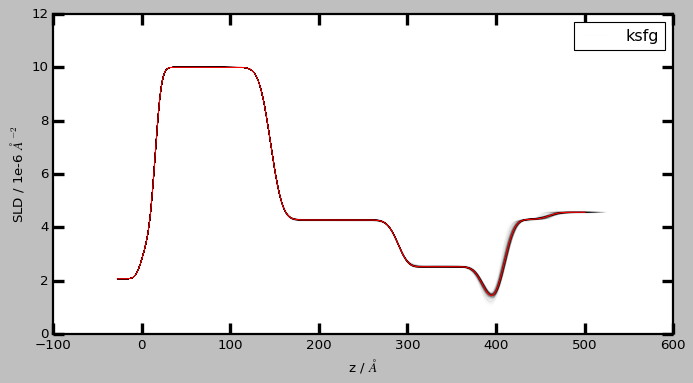

In [19]:
from refnx.reflect.structure import sld_profile
fig, ax = model_gmw_up.structure.plot(samples=300)
ax.get_lines()[1].set_color("blue")
ax.legend(['ksfg'])
# ax.set_yscale('log')
# ax.set_xscale('log')

In [17]:
ll = {}
for par in global_objective.varying_parameters().parameters:
    ll[par.name] = [par.value, par.stderr, par.bounds]

df = pd.DataFrame(ll)
df = df.T
df.columns = ['value', 'stderr', 'bounds']
df.to_csv('MscL_No_PXG_pars.csv')
print(global_objective.chisqr())
df
# print(repr(global_objective))

3384.436362521058


value      stderr          bounds
WPLH                           5.70614     1.01324     [5.0, 30.0]
lipid_APMT                     98.7428     1.99115   [40.0, 100.0]
lipid_APM                      79.1504     1.23253    [50.0, 80.0]
bilayer coverage              0.656841   0.0151292      [0.0, 1.0]
protrus_thick                  48.1068     2.41978     [0.0, 65.0]
PCoverage                     0.168008   0.0132605      [0.0, 0.3]
common scale                   1.00008  0.00162426      [0.9, 1.1]
bkg                        7.89958e-06  3.2882e-07  [1e-07, 1e-05]
PDP_thick                      8.34448    0.693099     [5.0, 15.0]
PDP_hydration                  0.23266   0.0185184      [0.2, 0.6]
PEG_thick                      79.7127     1.07166   [40.0, 100.0]
PEG_rough                      6.12914    0.804938     [5.0, 25.0]
PEG_hydration                 0.470733  0.00320012      [0.2, 1.0]
d2o SLD                         6.2052   0.0128347     [6.1, 6.36]
bilayer/solvent roughness      5.20714      3.4979     [2.0, 15.0]
gmw SLD                        4.55351   0.0111836      [4.1, 4.7]

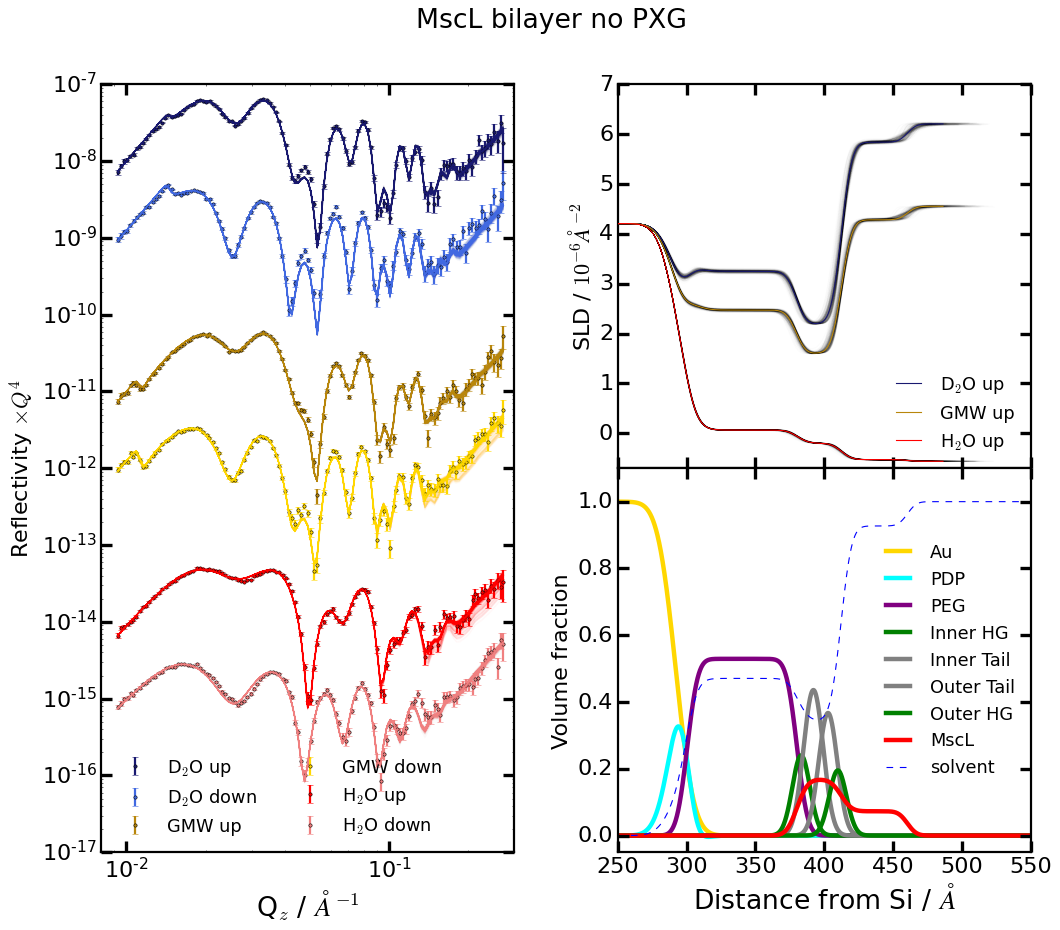

In [15]:
def _profile(ax, objective, col='black', pvals=None, samples=0):
    model = objective.model
    params = model.parameters

    if pvals is not None:
        params.pvals = pvals


    if samples > 0:
        saved_params = np.array(params)
        # Get a number of chains, chosen randomly, and plot the model.
        for pvec in model.parameters.pgen(ngen=samples):
            params.pvals = pvec

            ax.plot(*model.structure.sld_profile(align=0), color="k", alpha=0.01)

        # put back saved_params
        params.pvals = saved_params
    ax.plot(*model.structure.sld_profile(align=0), color=col, zorder=20, label=objective.data.name)
    ax.legend(loc=0, prop={"size": 16})
#     fig.subplots_adjust(right=0.7)
    ax.tick_params(axis='both', which='major', labelsize=20, direction='in')
    ax.tick_params(axis='both', which='minor', labelsize=12)
    ax.set_ylabel("SLD / $10^{-6} \\AA^{-2}$", fontsize=20)
#     ax.set_xlabel("z / $\\AA$")
    
    
# explictit function to hide index
# of subplots in the figure
def formatAxes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
 
 
# import required modules
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
 
# create objects
fig = plt.figure(constrained_layout=False, figsize=[15, 12])
fig.set_constrained_layout_pads(vspace=0.0, v_pad=0.0) 
gs = GridSpec(2, 2, figure=fig)
gs.update(hspace=0, wspace=0.25) # set the spacing between axes.
 
# create sub plots as grid
# NR profiles
ax1 = fig.add_subplot(gs[:, 0]) 
ax1.set_xlim([0.008, 0.3])
# ax1.set_ylim([8e-2,1e7])
ax1.ticklabel_format(style='sci', useOffset=True)

# SLD profiles
ax2 = fig.add_subplot(gs[0, 1]) 
ax2.set_xlim([250, 550])
ax2.set_ylim([-0.7, 7])

# volume fraction profiles
ax3 = fig.add_subplot(gs[1, 1], sharex=ax2) 
# ax4 = fig.add_subplot(gs[-1, 0])
# ax5 = fig.add_subplot(gs[-1, -2])

my_plot(ax1, [objective_d2o_up, objective_d2o_down, objective_gmw_up, 
         objective_gmw_down, objective_h2o_up, objective_h2o_down])

_profile(ax2, objective_d2o_up, "midnightblue", samples=300)
_profile(ax2, objective_gmw_up, "darkgoldenrod", samples=300)
_profile(ax2, objective_h2o_up, "red", samples=300)
ax2.legend(loc=4, prop={"size": 16},frameon=False)
ax2.tick_params(bottom=True, labelbottom=False)#, left=False, labelleft=False)
ax2.set_xlabel('', linespacing=0)
plot_volume_profiles(ax3, model_d2o_up.structure, 250, 550)

# depict illustration
fig.suptitle("MscL bilayer no PXG", fontsize=24)
fig.patch.set_facecolor('white')
# fig.tight_layout()
# formatAxes(fig)
plt.savefig('Figures/BilayerOnly_NR_SLD_volFrac_2', dpi=800)
plt.show()

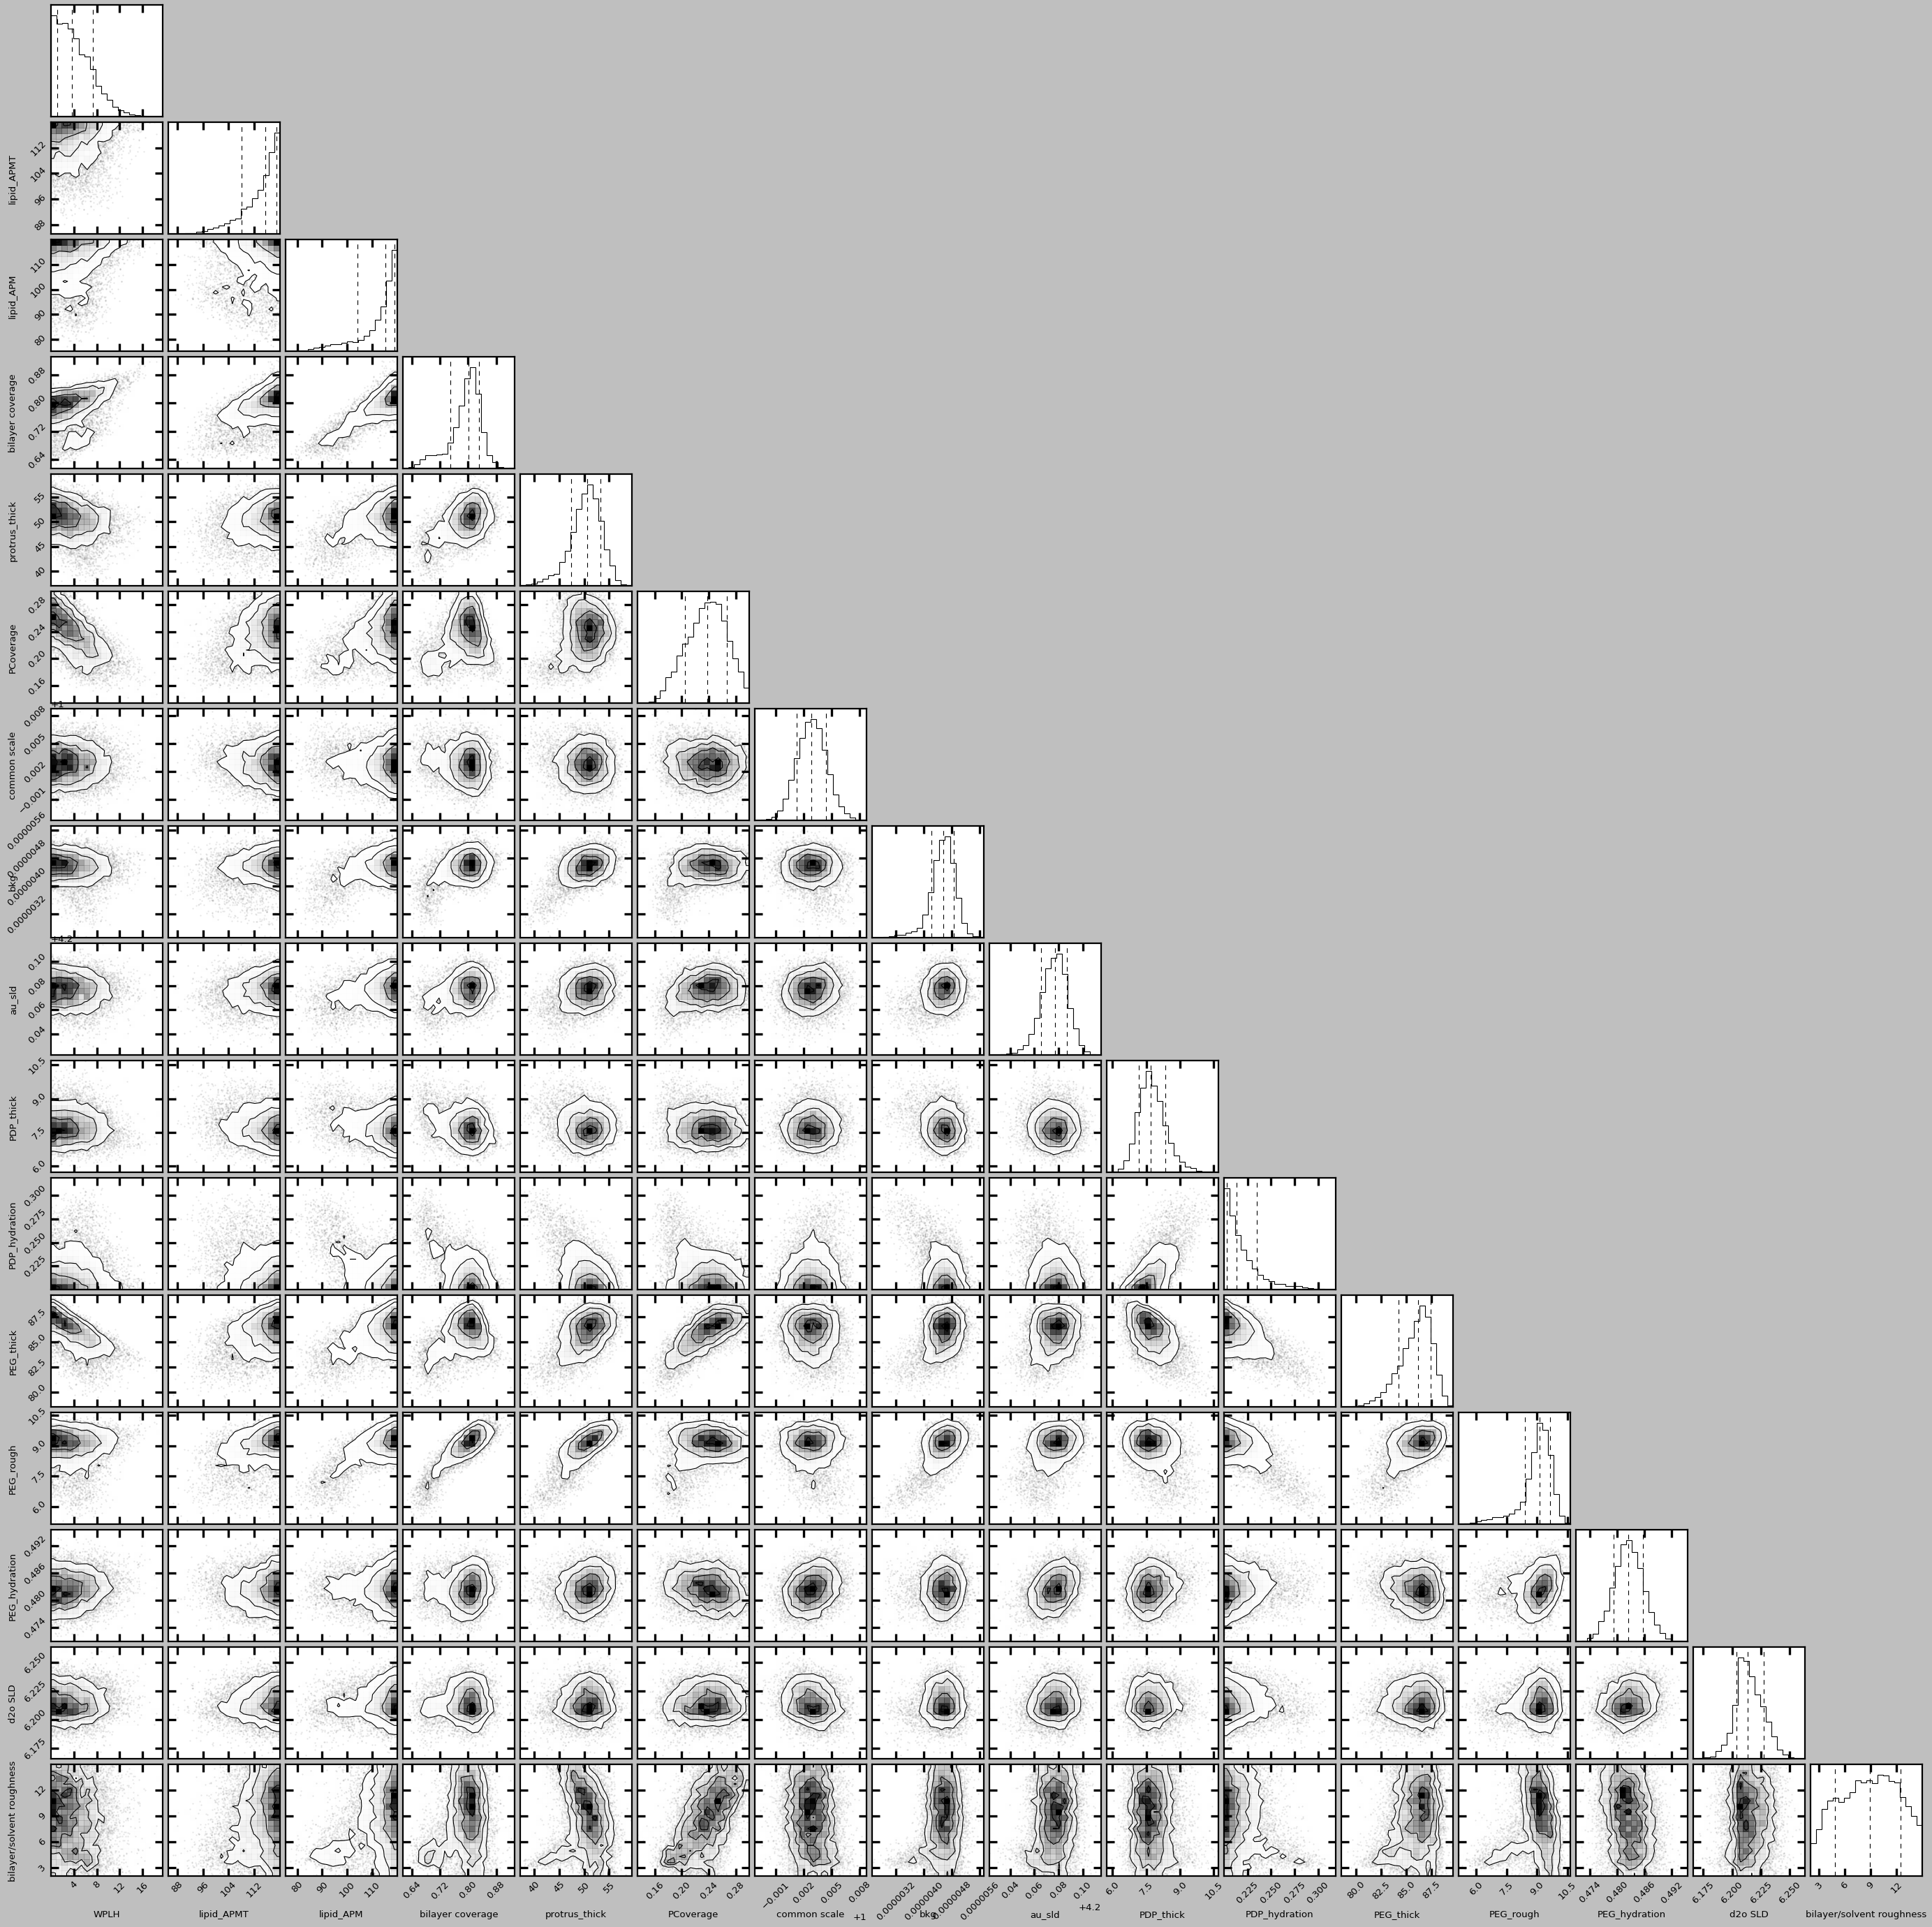

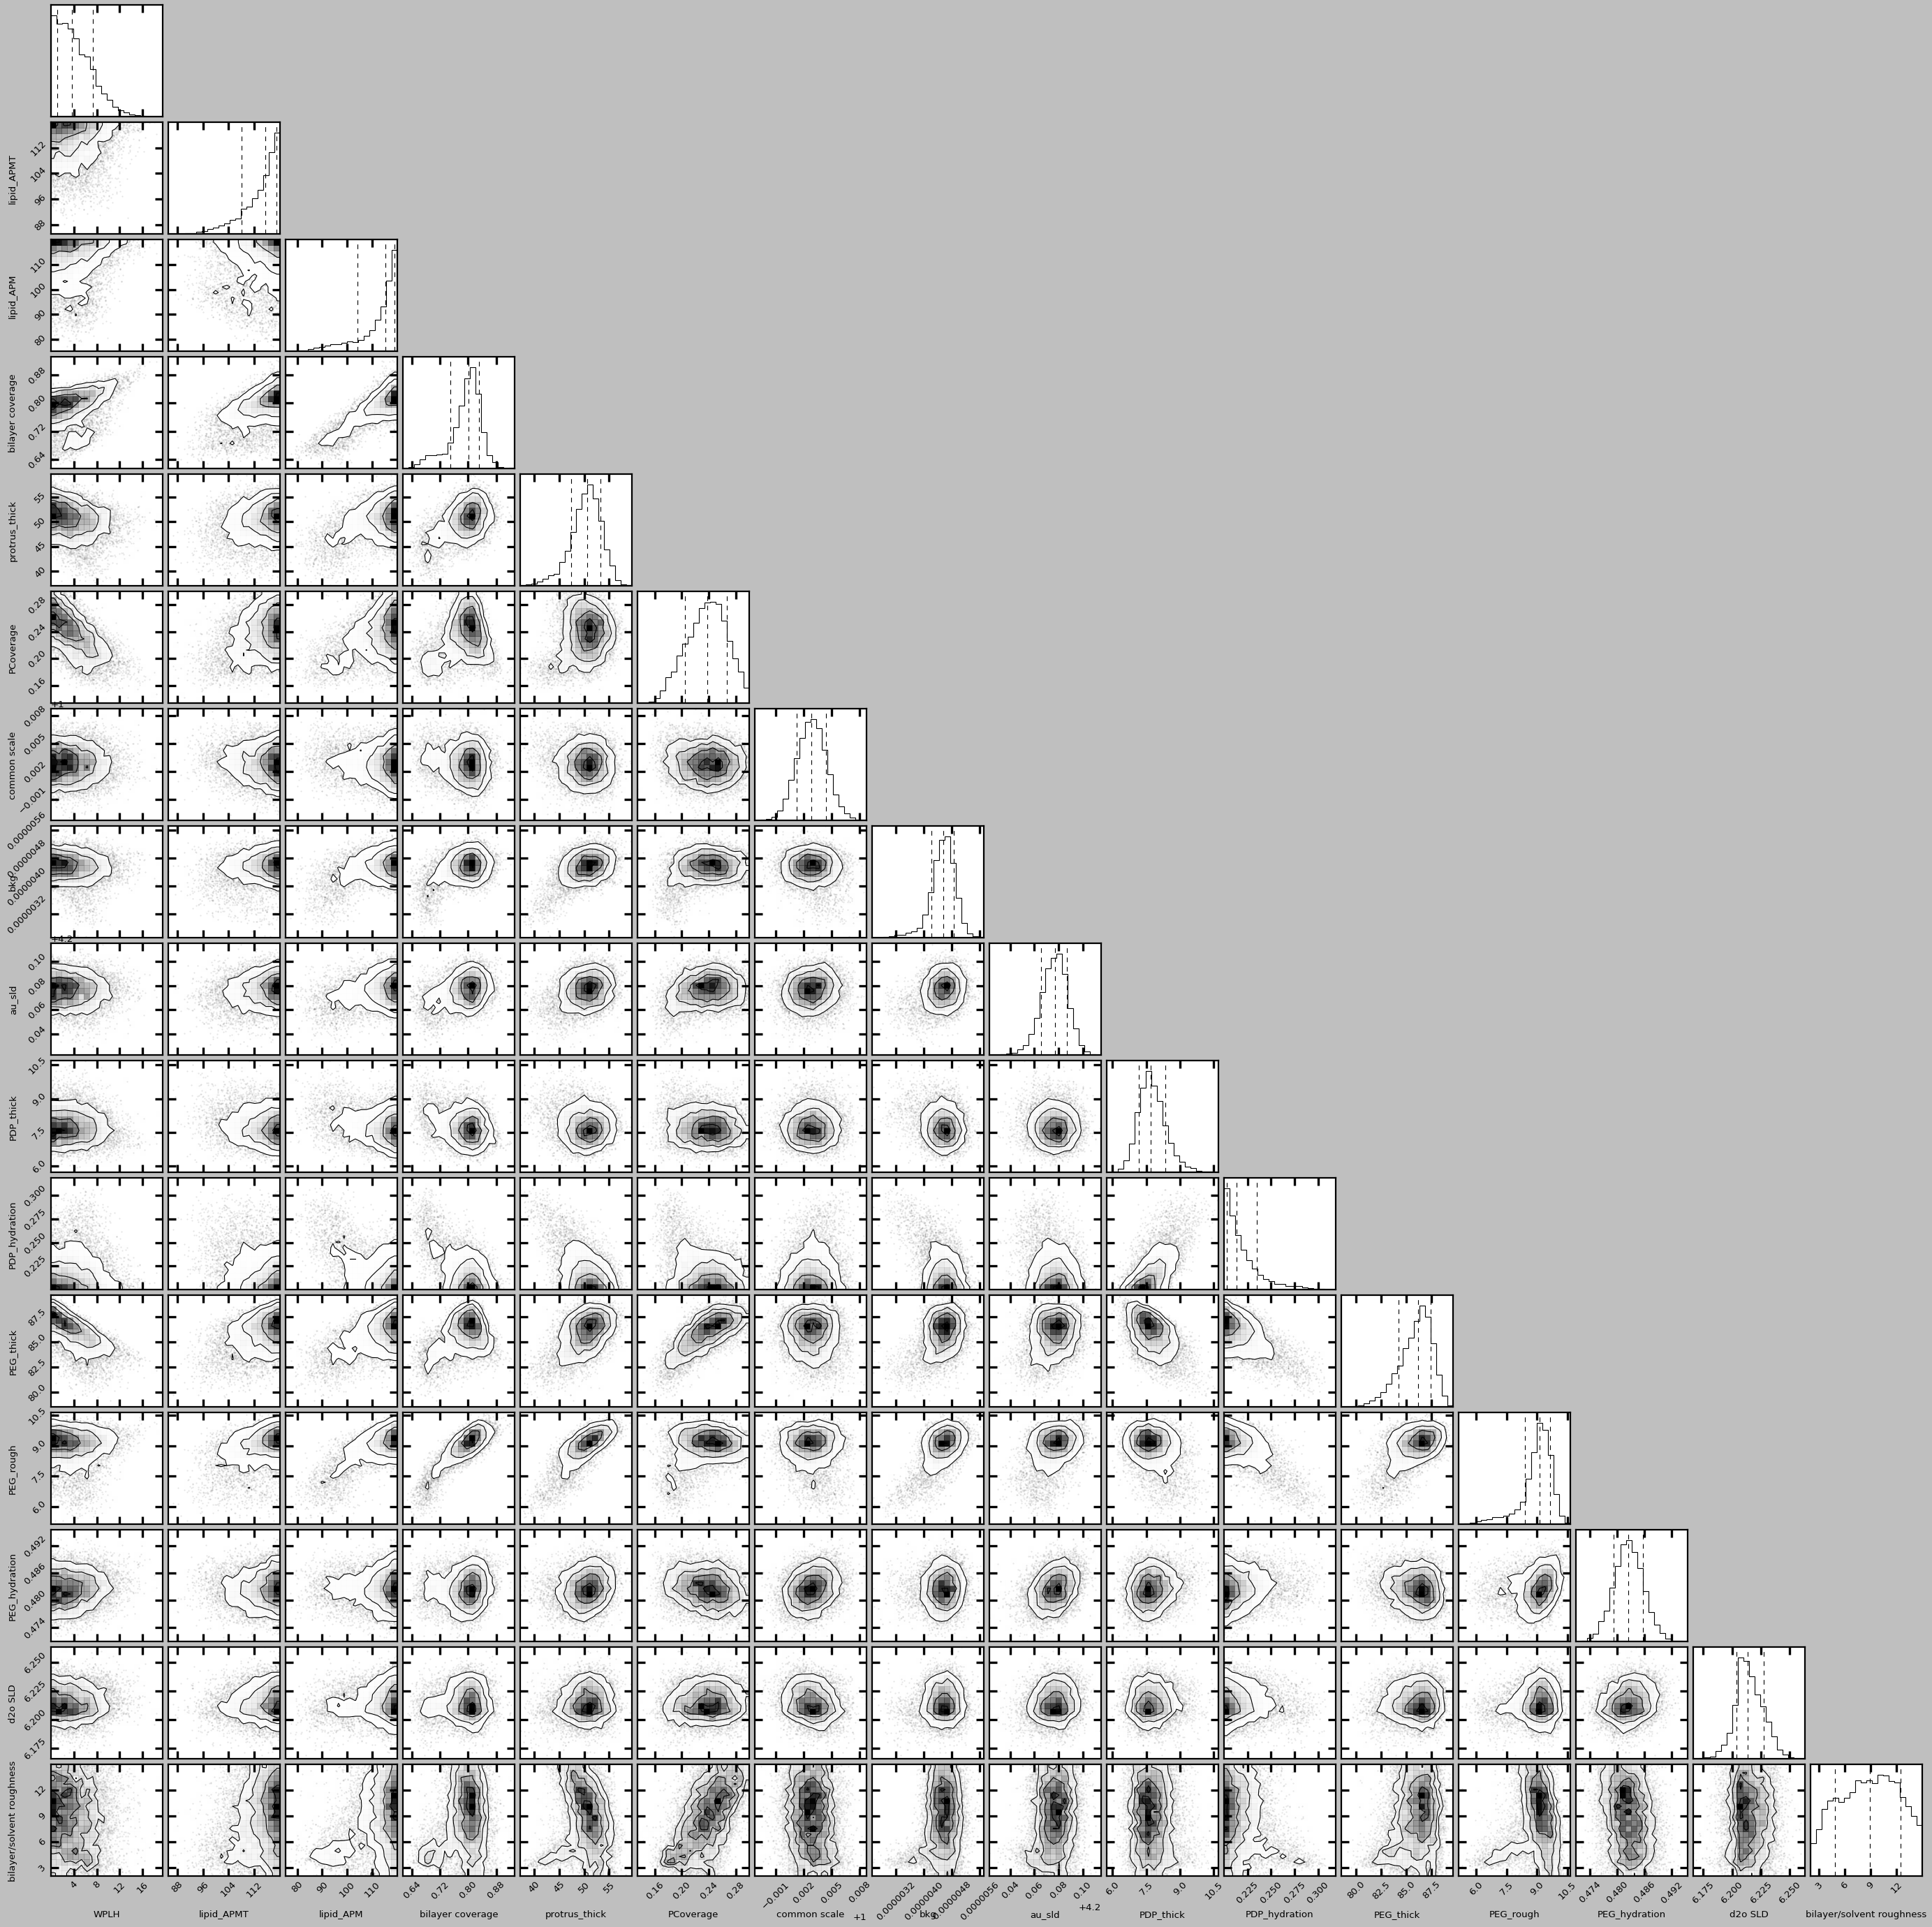

In [27]:
objective_d2o_up.corner()

(array([  2.,   1.,   6.,   7.,   7.,  10.,  14.,  17.,  17.,  25.,  30.,
         28.,  47.,  45.,  64.,  50.,  70.,  86.,  96., 149., 154., 185.,
        213., 260., 301., 351., 392., 438., 456., 487., 508., 527., 479.,
        427., 427., 359., 305., 276., 183., 149., 136.,  95.,  49.,  26.,
         18.,  16.,   4.,   4.,   0.,   4.]),
 array([37.11644317, 37.56582434, 38.01520552, 38.46458669, 38.91396787,
        39.36334904, 39.81273022, 40.26211139, 40.71149257, 41.16087374,
        41.61025492, 42.05963609, 42.50901727, 42.95839844, 43.40777962,
        43.85716079, 44.30654197, 44.75592314, 45.20530432, 45.65468549,
        46.10406667, 46.55344784, 47.00282902, 47.45221019, 47.90159137,
        48.35097254, 48.80035372, 49.24973489, 49.69911607, 50.14849725,
        50.59787842, 51.0472596 , 51.49664077, 51.94602195, 52.39540312,
        52.8447843 , 53.29416547, 53.74354665, 54.19292782, 54.642309  ,
        55.09169017, 55.54107135, 55.99045252, 56.4398337 , 56.88921487,
 

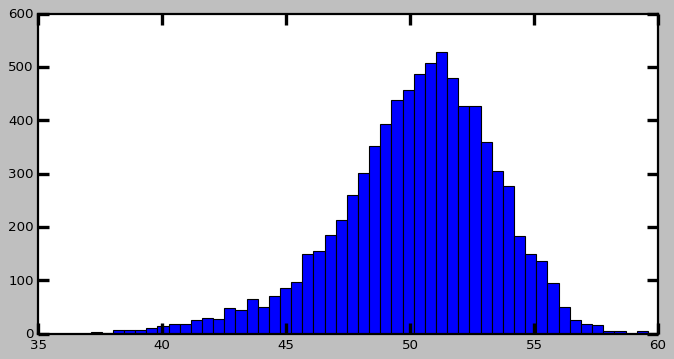

In [29]:
import pickle
prot_thick = global_objective.varying_parameters().parameters[4]
chain = prot_thick.chain.flatten()
np.save("no_PXG_protrusion_histo", chain)

# load other histos:
# chain_1p6 = np.load("1p6_PXG_protrusion_histo.npy")
# chain_3p2 = np.load("3p2_PXG_protrusion_histo.npy")
# use matplotlib to plot a histogram

plt.hist(chain, bins=50)
# plt.hist(chain_1p6, alpha=0.5, bins=50)
# plt.hist(chain_3p2, alpha=0.5, bins=50)


In [50]:
!pip install dynesty

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [68]:
import sys
sys.path.append('/home/ms9743/.local/lib/python3.11/site-packages')
import dynesty

nested_sampler = dynesty.NestedSampler(
        global_objective.logl,
        global_objective.prior_transform,
        ndim=len(global_objective.varying_parameters())
    )
# running without protrusion layer
nested_sampler.run_nested()

30935it [11:04:06,  1.29s/it, +500 | bound: 163 | nc: 1 | ncall: 3863770 | eff(%):  0.814 | loglstar:   -inf < 3806.228 <    inf | logz: 3744.880 +/-  0.343 | dlogz:  0.001 >  0.509]


In [69]:
print("logz without protrusion: ", nested_sampler.results.logz[-1])

logz without protrusion:  3744.8800977154815


In [60]:
print("logz with protrusion: ", nested_sampler.results.logz[-1])

logz with protrusion:  3876.415468535444
